# Ch 2.3

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv("data/Auto.csv")

In [94]:
auto = auto.replace("?", np.nan)
auto["horsepower"] = auto["horsepower"].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
auto = auto.dropna()

## Ex 9

In [95]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [96]:
auto_quant = auto.drop(["name"], axis=1)
auto_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [97]:
for column in auto_quant.columns:
    min_value = auto_quant[column].min()
    max_value = auto_quant[column].max()
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")

Column: mpg, Min: 9.0, Max: 46.6
Column: cylinders, Min: 3, Max: 8
Column: displacement, Min: 68.0, Max: 455.0
Column: horsepower, Min: 46.0, Max: 230.0
Column: weight, Min: 1613, Max: 5140
Column: acceleration, Min: 8.0, Max: 24.8
Column: year, Min: 70, Max: 82
Column: origin, Min: 1, Max: 3


In [98]:
for column in auto_quant.columns:
    mean_value = auto_quant[column].mean()
    std_value = auto_quant[column].std()
    print(f"Col: {column}, Mean: {mean_value}, Std: {std_value}")

Col: mpg, Mean: 23.445918367346938, Std: 7.8050074865717995
Col: cylinders, Mean: 5.471938775510204, Std: 1.7057832474527845
Col: displacement, Mean: 194.41198979591837, Std: 104.64400390890466
Col: horsepower, Mean: 104.46938775510205, Std: 38.49115993282849
Col: weight, Mean: 2977.5841836734694, Std: 849.4025600429492
Col: acceleration, Mean: 15.541326530612244, Std: 2.758864119188082
Col: year, Mean: 75.9795918367347, Std: 3.6837365435778295
Col: origin, Mean: 1.5765306122448979, Std: 0.8055181834183056


In [99]:
auto_subset = auto.iloc[9:85, :-1]

print(f"{'Column':<15}{'Min':<10}{'Max':<10}{'Mean':<15}{'Std':<10}\n")
for column in auto_subset.columns:
    min_value = auto_subset[column].min()
    max_value = auto_subset[column].max()
    mean_value = auto_subset[column].mean()
    std_value = auto_subset[column].std()
    print(f"{column:<15}{min_value:<10}{max_value:<10}{mean_value:<15.2f}{std_value:<10.2f}")

Column         Min       Max       Mean           Std       

mpg            9.0       35.0      19.46          6.14      
cylinders      3         8         5.88           1.86      
displacement   70.0      455.0     224.23         119.33    
horsepower     46.0      225.0     120.05         45.42     
weight         1613      5140      3150.61        979.41    
acceleration   8.0       23.5      14.77          2.91      
year           70        73        71.13          0.82      
origin         1         3         1.47           0.74      


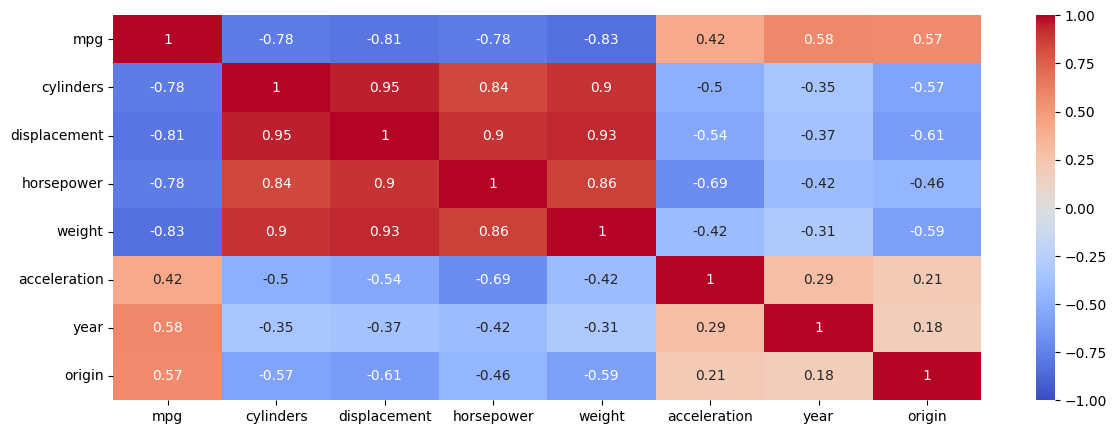

In [100]:
plt.figure(figsize=(14, 5))
sns.heatmap(auto_quant.corr("pearson").round(2), annot=True, center=0, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Ex 10

In [101]:
from ISLP import load_data

boston = load_data('Boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [102]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


---
crim: per capita crime rate by town.  
zn: proportion of residential land zoned for lots over 25,000 sq. ft.  
indus: proportion of non-retail business acres per town.  
chas: a factor indicating whether the tract borders the Charles River (1 if it does, 0 otherwise).  
nox: nitrogen oxides concentration (parts per 10 million).  
rm: average number of rooms per dwelling.  
age: proportion of owner-occupied units built prior to 1940.  
dis: weighted mean of distances to five Boston employment centers.  
rad: index of accessibility to radial highways.  
tax: full-value property-tax rate per $10,000.  
ptratio: pupil-teacher ratio by town.  
lstat: lower status of the population (percent).  
medv: median value of owner-occupied homes in $1000s.  

<Axes: >

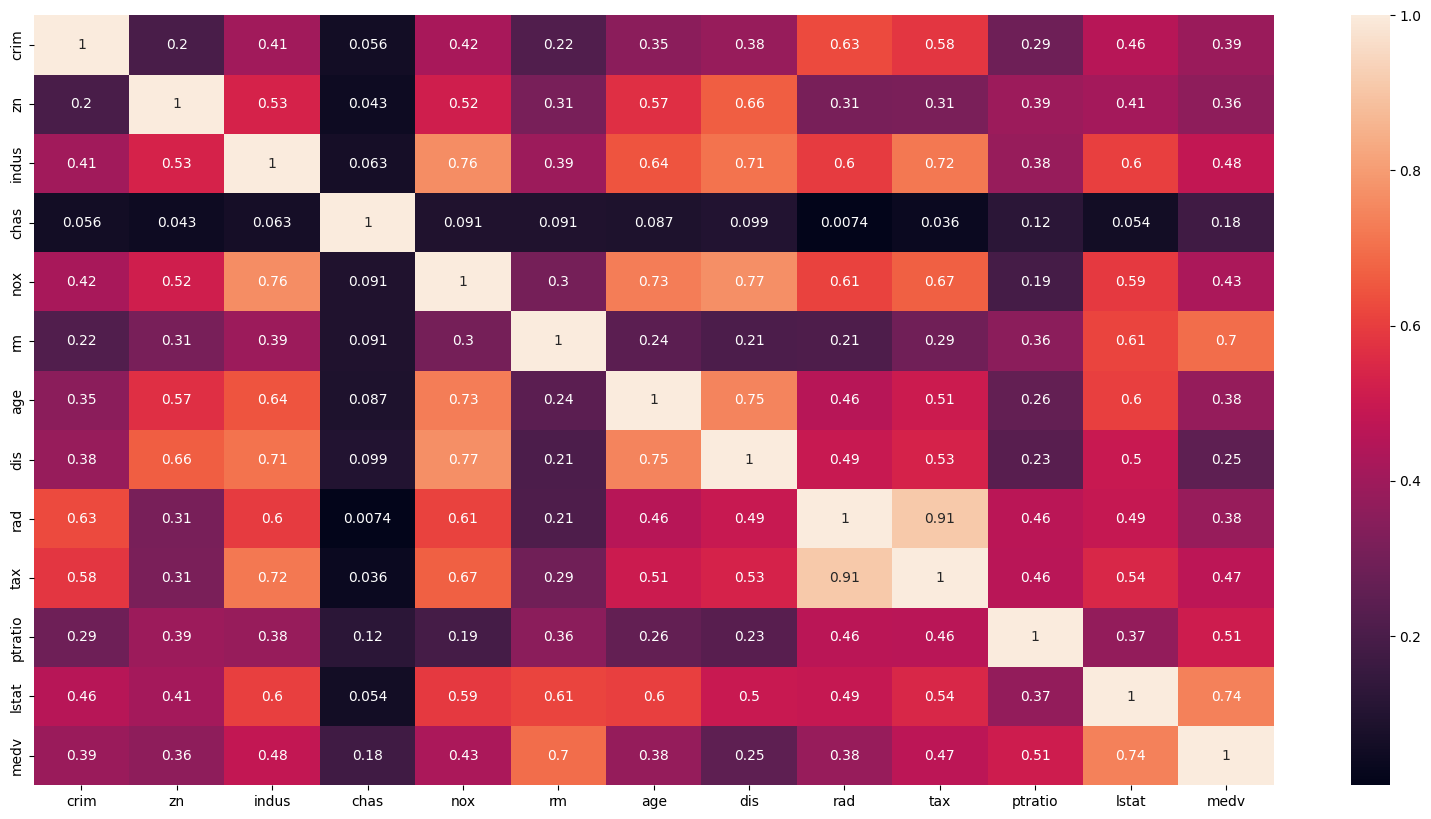

In [103]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(),  annot=True)

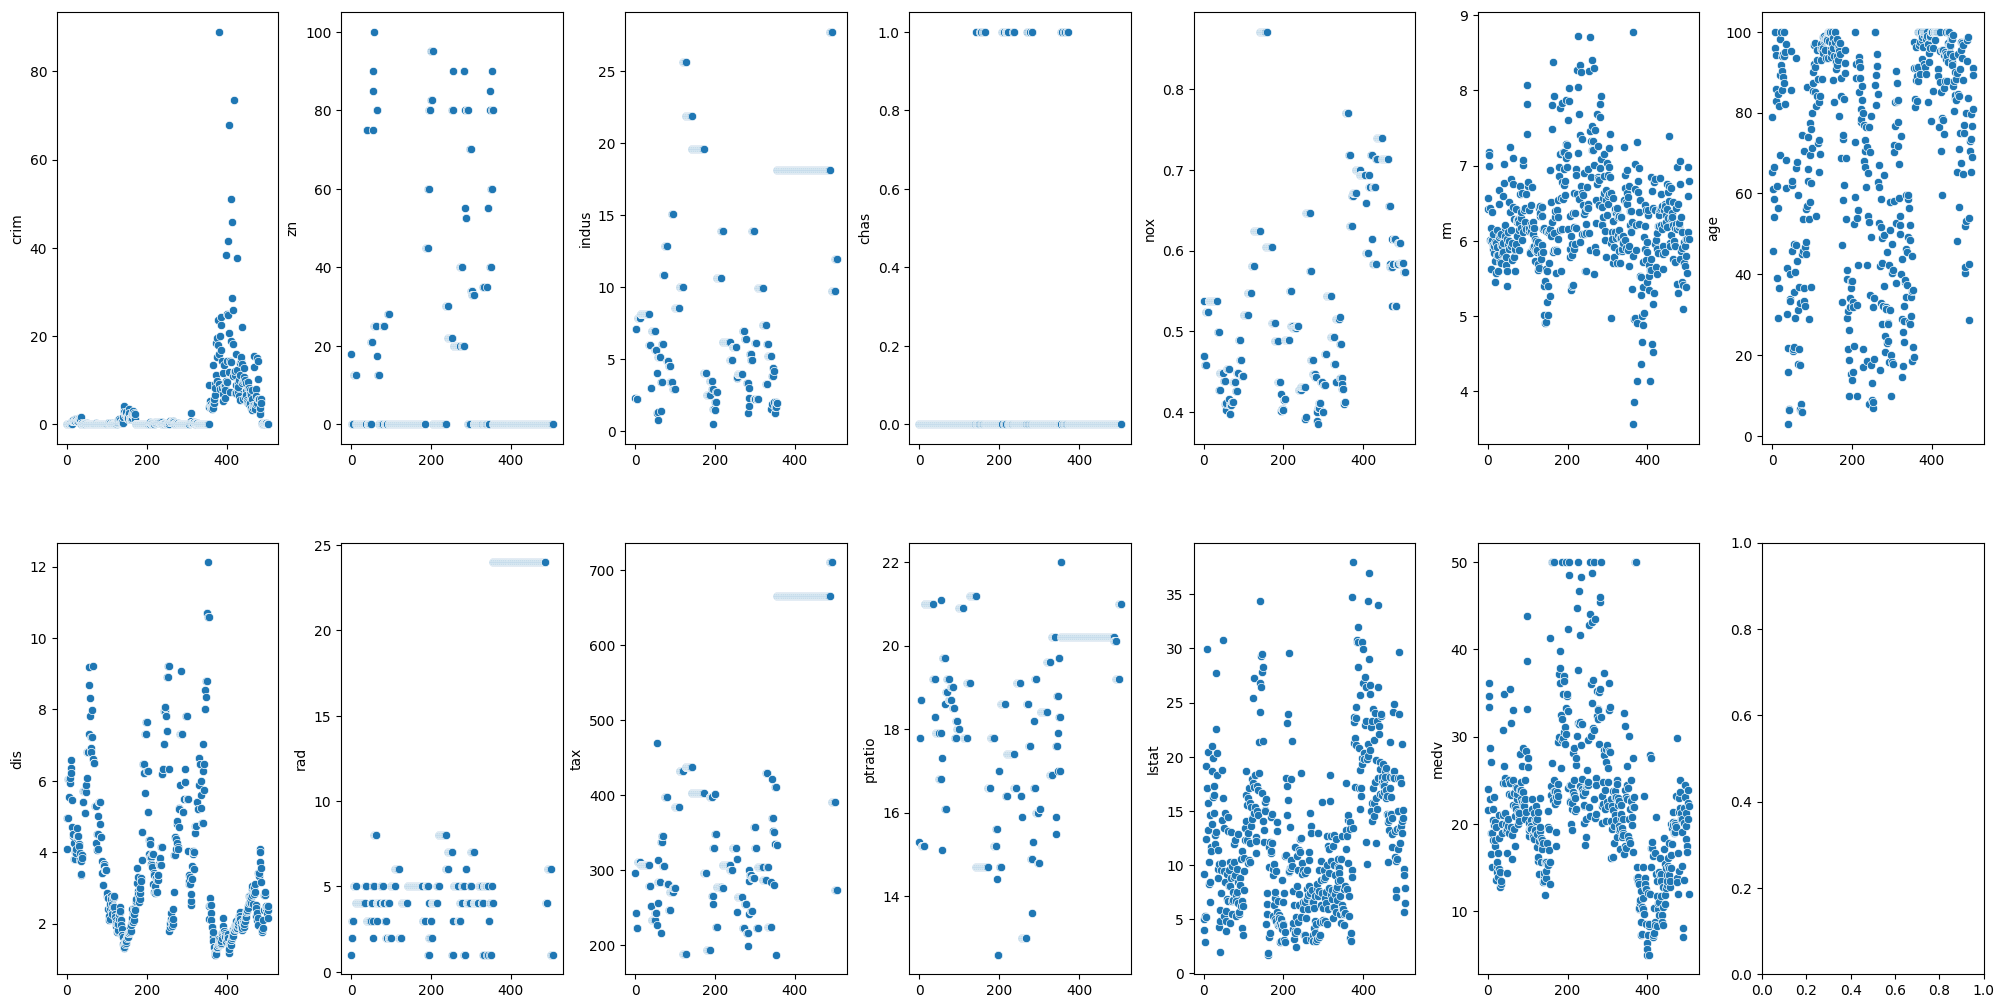

In [104]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.scatterplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: xlabel='lstat', ylabel='medv'>

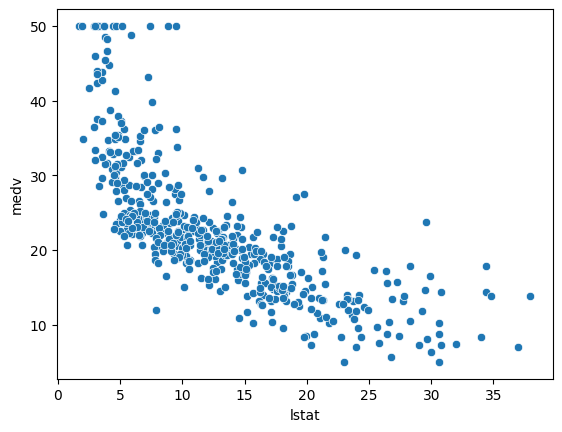

In [105]:
sns.scatterplot(x=boston["lstat"], y=boston["medv"])

<Axes: xlabel='nox', ylabel='crim'>

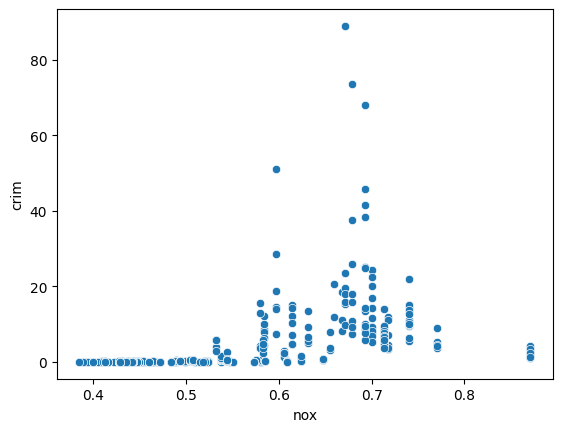

In [106]:
sns.scatterplot(x=boston["nox"], y=boston["crim"])

<Axes: xlabel='medv', ylabel='nox'>

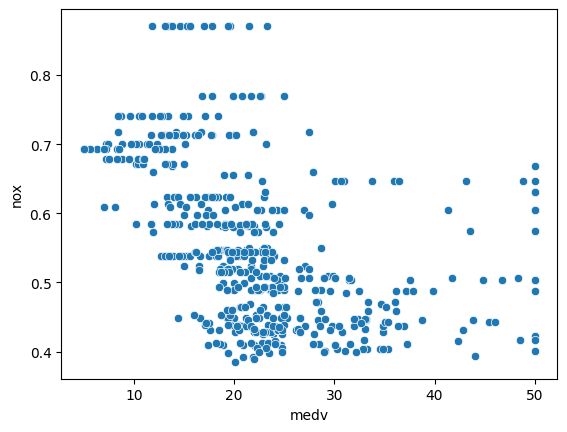

In [107]:
sns.scatterplot(x=boston["medv"], y=boston["nox"])

<Axes: xlabel='indus', ylabel='nox'>

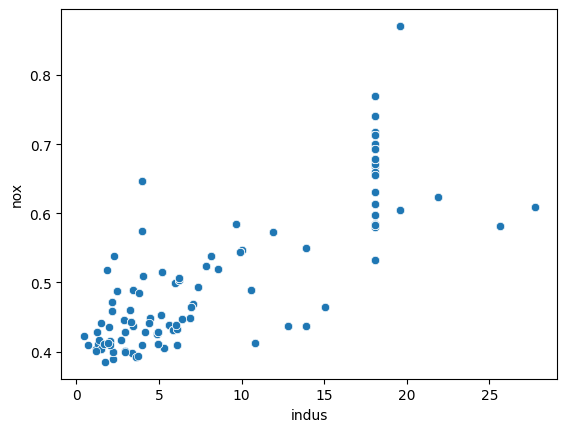

In [108]:
sns.scatterplot(x=boston["indus"], y=boston["nox"])

In [129]:
positive_cols = ["ptratio", "rm", "dis", "medv"]
negative_cols = ["crim", "nox", "lstat"]

positive_means = boston[positive_cols].mean()
negative_means = boston[negative_cols].mean()

positive_condition = (boston[positive_cols] > positive_means).all(axis=1)
negative_condition = (boston[negative_cols] < negative_means).all(axis=1)

topnotch = boston[positive_condition & negative_condition]

display(topnotch.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.4580,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
63,0.12650,25.0,5.13,0,0.4530,6.762,43.4,7.9809,8,284,19.7,9.50,25.0
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,8.05,33.0


Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        ~/coding/repos/stat_met/.venv/lib/python3.13/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is align